# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Kamron\Downloads\Achievement 4"

In [3]:
# Downloading the most recent data frame with the lastest additions - 'df_final.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_end_final.pkl'))

In [30]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [31]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,Busiest_days,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag,department,dependants_group,family_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regular busy,Regularly days,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,beverages,Has dependants,married female with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regular busy,Slowest days,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,beverages,Has dependants,married female with children
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regular busy,Slowest days,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,beverages,Has dependants,married female with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,beverages,Has dependants,married female with children
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,beverages,Has dependants,married female with children


In [32]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'Busiest_days',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'num_of_dependants',
       'marital_status', 'income', 'region', 'activity_flag', 'department',
       'dependants_group', 'family_profile'],
      dtype='object')

## Distribution of Family Profiles

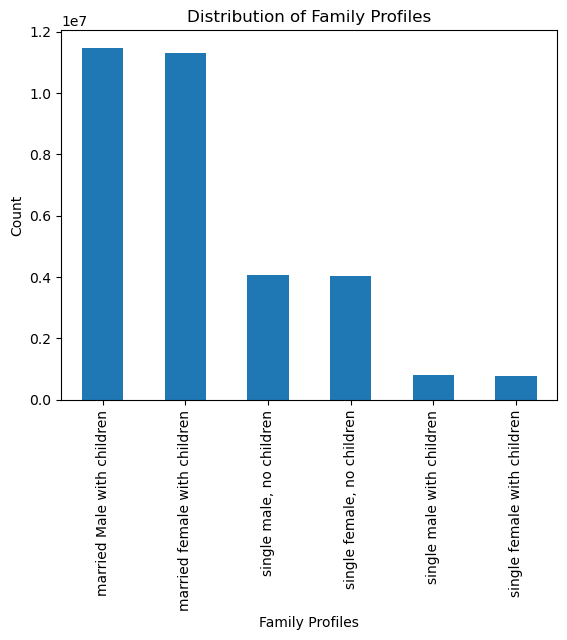

In [33]:
family_profile_distribution_bar = df['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [34]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_distribution_bar
family_profile_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution_bar.png'))

## Basic stats for Family Profile

In [35]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [36]:
family_profile_agg

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married Male with children    11471365    1.0  12.075959  99999.0
married female with children  11305548    1.0  11.936085  99999.0
single female with children     758436    1.0  12.054539  99999.0
single female, no children     4040605    1.0  11.742400  99999.0
single male with children       793666    1.0   9.661812  99999.0
single male, no children       4064592    1.0  12.515402  99999.0

## Comparing customers profiles with regions and departments
### Family Profile Distribution by Region

In [37]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False)

In [38]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married Male with children,2649136,2092468,3830213,2899548
married female with children,2680932,1947698,3737172,2939746
single female with children,179365,124431,266138,188502
"single female, no children",949571,694323,1375650,1021061
single male with children,187420,144049,263912,198285
"single male, no children",957386,725378,1328525,1053303


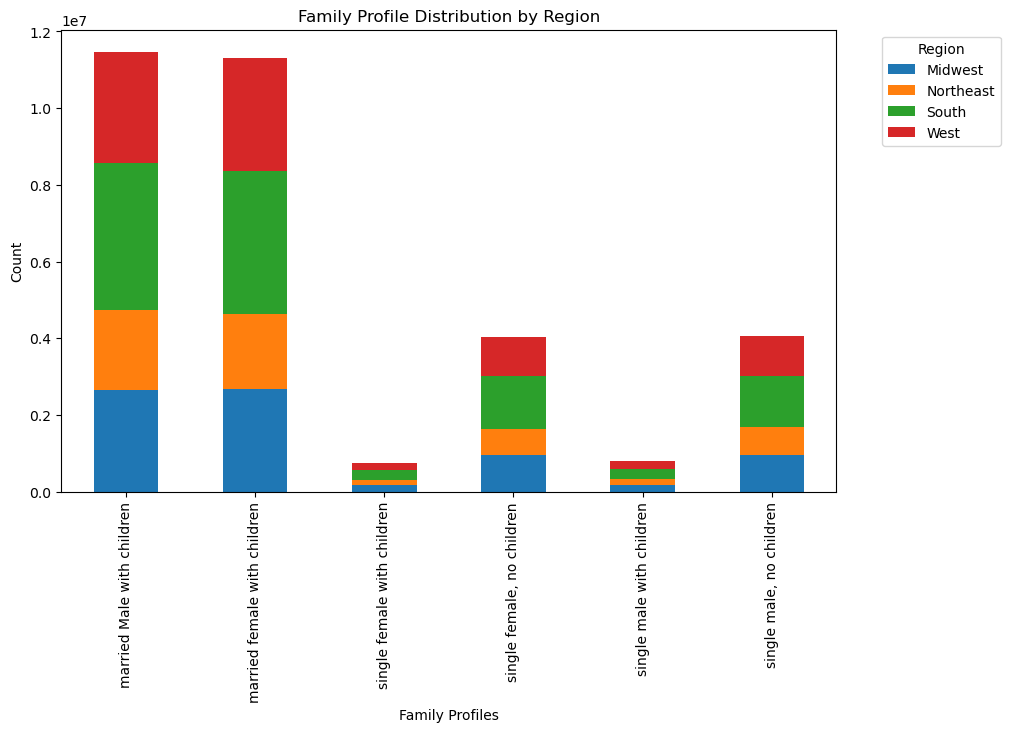

In [39]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [40]:
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_region_profile_bar_stacked.png'))

## Family Profile Distribution by Department

In [41]:
# Comparing family_profile in different departments - crosstab created 
fam_departments_profile = pd.crosstab(df['department'],df['family_profile'], dropna = False)

In [42]:
fam_departments_profile

family_profile,married Male with children,married female with children,single female with children,"single female, no children",single male with children,"single male, no children"
department,,,,,,
alcohol,50152,55551,4056,19741,4841,19402
babies,151706,145456,9634,52039,10512,54455
bakery,411846,413026,27724,146517,28653,149021
beverages,949057,940021,61041,336903,63590,337547
breakfast,250108,248936,17285,87935,17761,88622
bulk,12325,12296,795,4230,879,4048
canned goods,381123,370907,24266,131284,26924,133554
dairy eggs,1913262,1885730,128580,677307,133056,676081
deli,369917,365772,24892,131968,25523,133177


<Figure size 1000x1200 with 0 Axes>

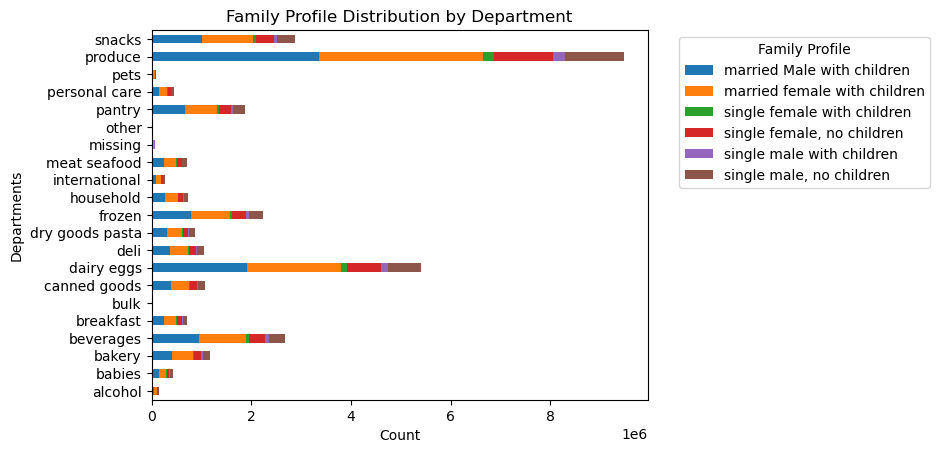

In [43]:
fam_departments_profile_bar = fam_departments_profile.sort_values(by='married female with children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_departments_profile.plot.barh(stacked=True)

plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar.png'))

# Show the plot
plt.show()

plt.show()


## Income (income_group) distribution stats

In [5]:
income_group_distribution_agg = df.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [6]:
income_group_distribution_agg

order_id prices                    
                  count    min       mean      max
income_group                                      
High Income     7747826    1.0  21.973157  99999.0
Low Income      7748855    1.0   7.315159  14900.0
Middle Income  15495983    1.0   9.225177  99999.0

## Income (income_group) Distribution

Text(0, 0.5, 'Count')

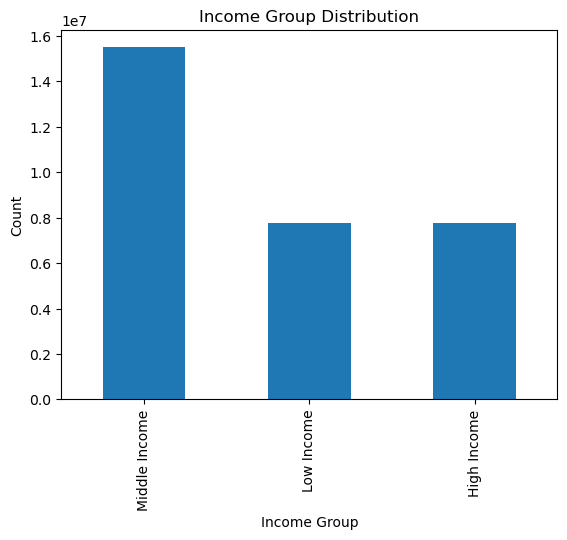

In [7]:
income_group_distribution = df['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [8]:
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution_bar.png'))

## Income (income_group) By Region

In [9]:
income_group_region = pd.crosstab(df['income_group'],df['region'], dropna = False)

In [10]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1843363,1374284,2551358,1978821
Low Income,1792303,1368421,2596210,1991921
Middle Income,3632041,2727363,5172894,3963685


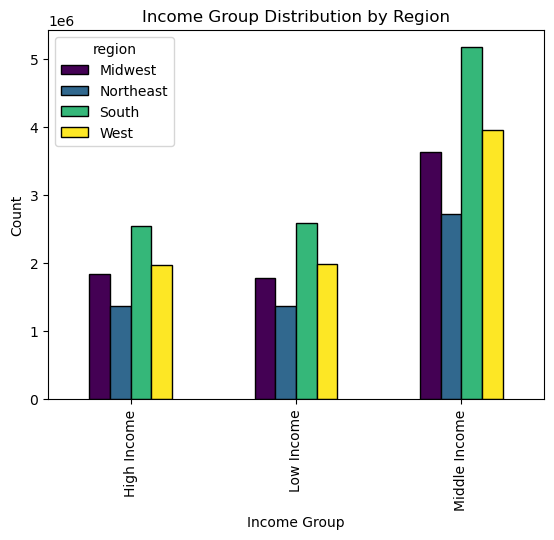

In [11]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [12]:
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_region_bar.png'))

## Income Group Distribution by Department

In [16]:
income_group_department = pd.crosstab(df['department'],df['income_group'], dropna = False) 

In [17]:
income_group_department

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,40885,36828,66961
babies,105674,83835,220883
bakery,291186,266848,566992
beverages,618524,743211,1210199
breakfast,164596,189503,323996
bulk,7541,9400,16510
canned goods,265861,222477,523736
dairy eggs,1317697,1232305,2641826
deli,251016,248154,504664


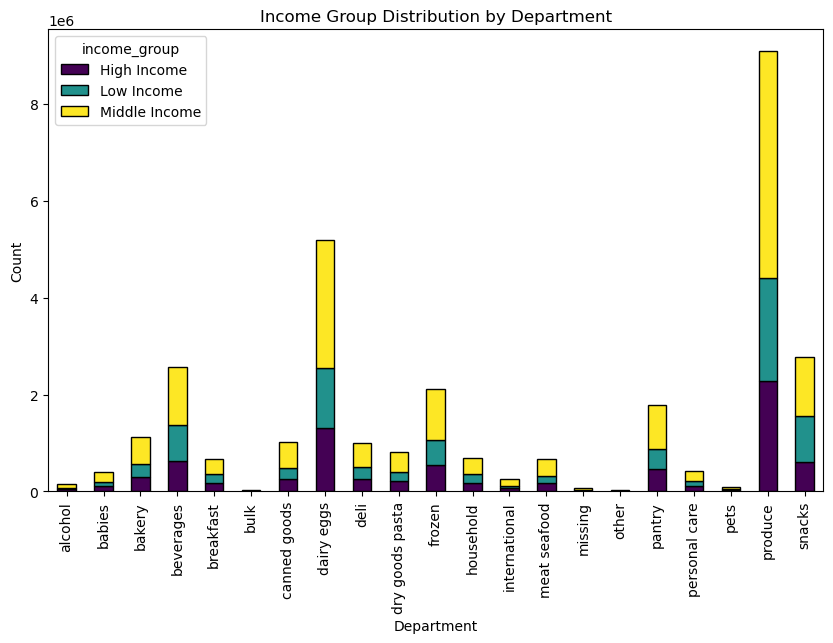

In [18]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()


In [19]:
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_department_bar.png'))

## Distribution of Age Groups

In [20]:
age_group_agg = df.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [21]:
age_group_agg

order_id prices                    
                    count    min       mean      max
age_group                                           
18-29 years old   5823021    1.0  12.199361  99999.0
30-44 years old   7267646    1.0  11.682374  99999.0
45-59 years old   7318056    1.0  12.276107  99999.0
60-81 years old  10583941    1.0  11.725665  99999.0

Text(0, 0.5, 'Count')

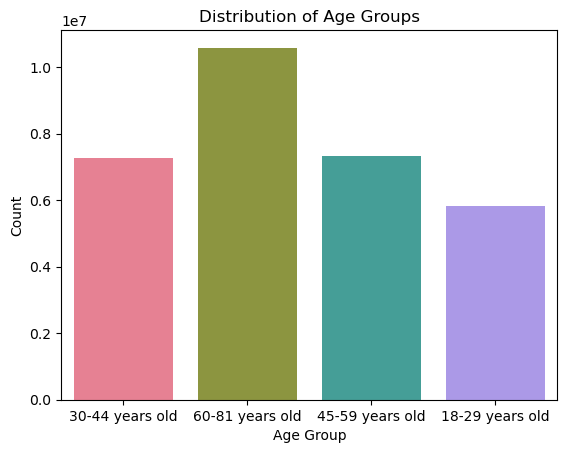

In [22]:
colors = sns.color_palette("husl", len(df['age_group'].unique()))
age_group_distribution_bar = sns.countplot(x='age_group', data=df, palette=colors)

# Adding labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [23]:
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_bar.png'))

## Age Group by Region

In [24]:
age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [25]:
age_group_region

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
region,,,,
Midwest,1356946,1716912,1736500,2457349
Northeast,1025132,1259287,1299597,1886052
South,1962570,2448911,2384397,3524584
West,1478373,1842536,1897562,2715956


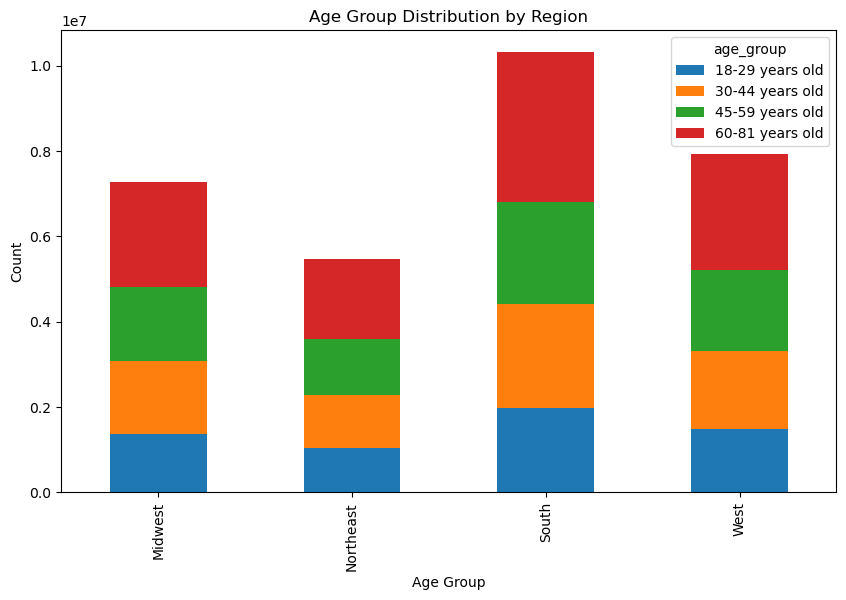

In [26]:
age_group_region_bar = age_group_region.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [27]:
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_bar.png'))

## Age Group by Department

In [29]:
age_group_department = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [30]:
age_group_department

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
department,,,,
alcohol,27942,33420,35682,47630
babies,77758,96520,97376,138738
bakery,211198,264600,265577,383651
beverages,477658,595548,615048,883680
breakfast,129590,157742,160558,230205
bulk,6414,7794,7819,11424
canned goods,192170,236621,238836,344447
dairy eggs,978948,1223728,1221493,1767659
deli,188533,235992,235974,343335


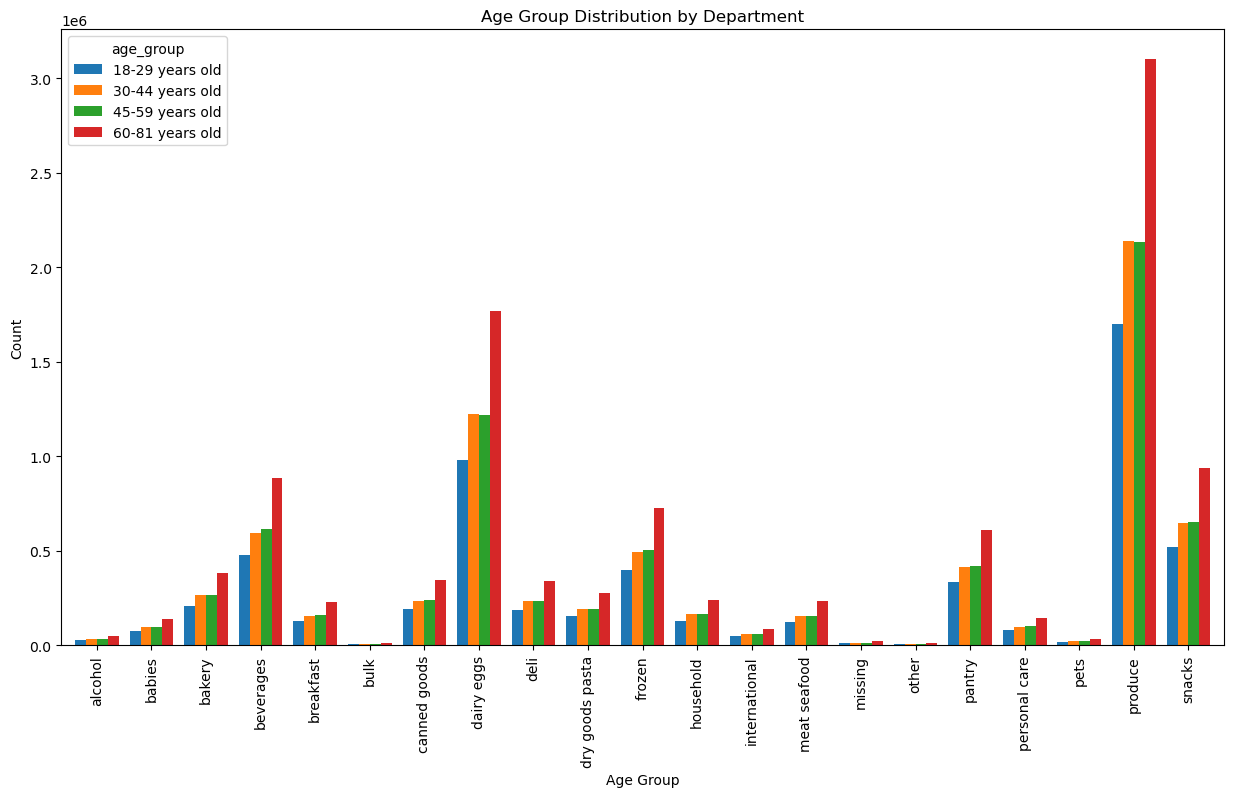

In [31]:
age_group_department_bar = age_group_department.plot(kind='bar', figsize=(15, 8), width=0.8)  # You can adjust the width as needed
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [32]:
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_department_bar.png'))

## Most Requested Departments

In [33]:
department_stats = df.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [34]:
department_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           144674    1.0   8.151446     15.0
babies            410392    1.0   7.634399     15.0
bakery           1125026    1.0   7.868462     15.0
beverages        2571934    1.0   7.682624     15.0
breakfast         678095    1.0   8.068044     14.9
bulk               33451    1.4   8.346919     14.1
canned goods     1012074    1.0   7.546660     15.0
dairy eggs       5191828    1.0  33.061592  99999.0
deli             1003834    1.0   7.783347     15.0
dry goods pasta   822136    1.0   7.349370     15.0
frozen           2123342    1.0   7.738627     15.0
household         699858    1.0   7.379943     15.0
international     255991    1.0   7.678797     15.0
meat seafood      674785    8.0  16.300062     25.0
missing            64768    1.0   8.660655     15.0
other              34411    1.1   6.961995     15.0
pantry           1782903    1.0   8.014940     20.0
personal care     424415    1.0   7.998617     15.0
pets               93065    1.0   7.887860     15.0
produce          9079276    1.0   7.980349     15.0
snacks           2766406    1.6   4.275555      7.0

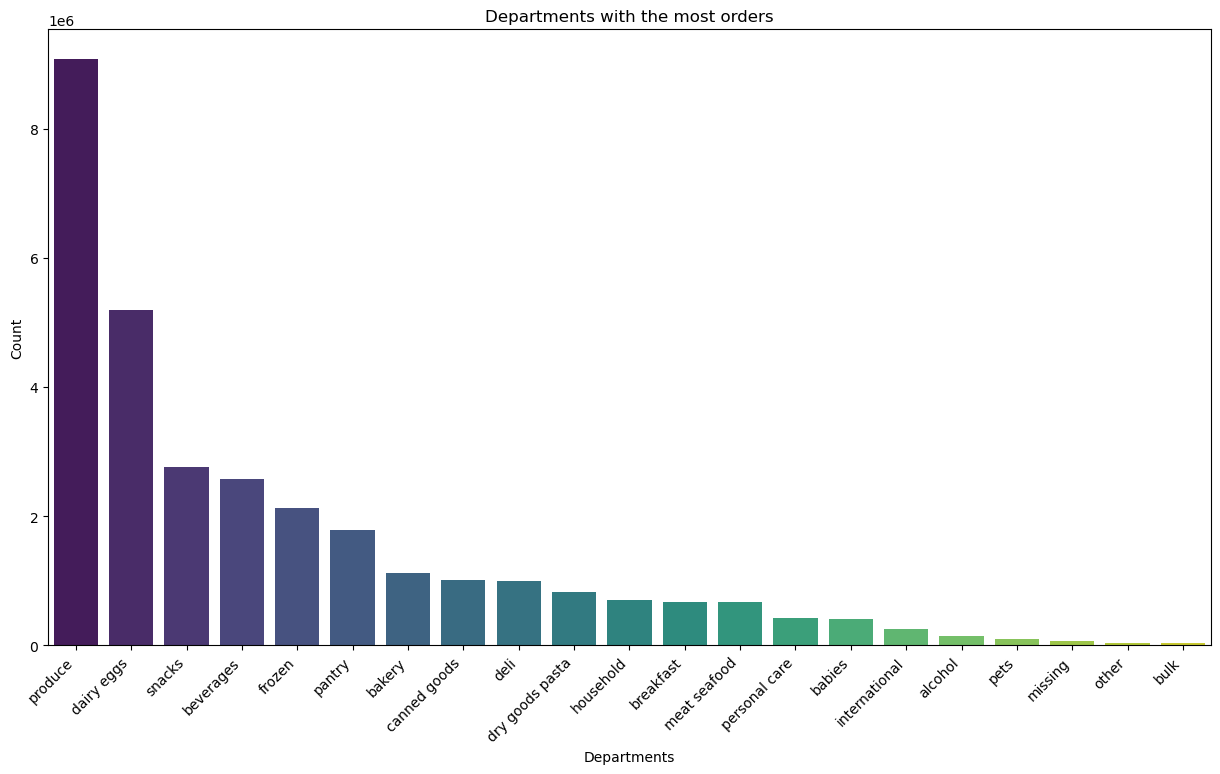

In [36]:
department_counts = df['department'].value_counts()
departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Departments with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [37]:
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_distribution_bar.png'))

## Departments by Region

In [39]:
departments_region = pd.crosstab(df['department'],df['region'], dropna = False)

In [40]:
departments_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


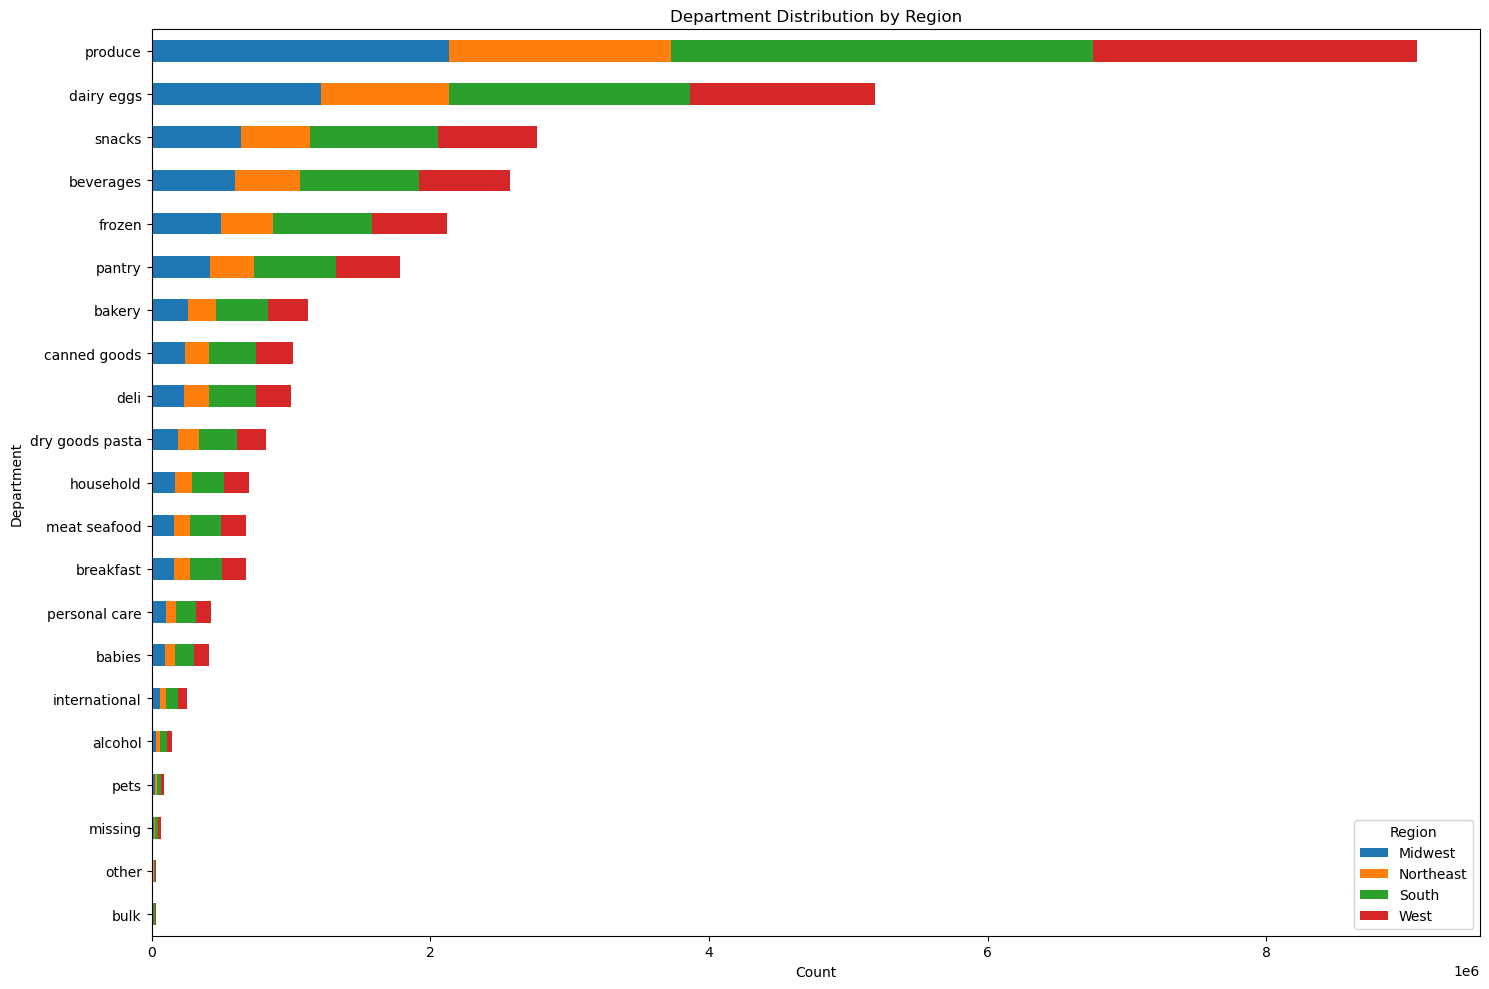

In [41]:
departments_region_bar = depatments_region.sort_values(by='Midwest', ascending=True).plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_region_bar.png'))
plt.show()


In [42]:
departments_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_region_bar.png'))

# Sales Team Key Questions - Answers

### Busiest days of the week

In [43]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5913818
1    5417038
6    4294900
5    4037263
2    4028461
3    3672927
4    3628257
Name: count, dtype: int64

In [44]:
#Knowing that 0 = Saturday, 1 = Sunday, 2=Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df['week_days_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [45]:
df['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5913818
Sunday       5417038
Friday       4294900
Thursday     4037263
Monday       4028461
Tuesday      3672927
Wednesday    3628257
Name: count, dtype: int64

In [46]:
busiest_week_days = df['week_days_orders'].value_counts(dropna = False)

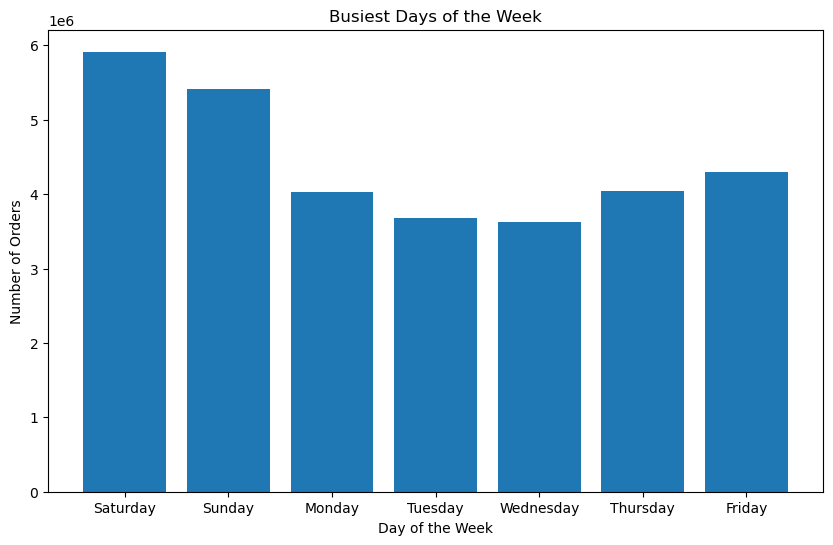

In [47]:
busiest_week_days_bar = df['week_days_orders'].value_counts()
# Sorting the days of the week in the correct order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_week_days_bar.png'))
# Show the plot
plt.show()


## Busiest hours of the day

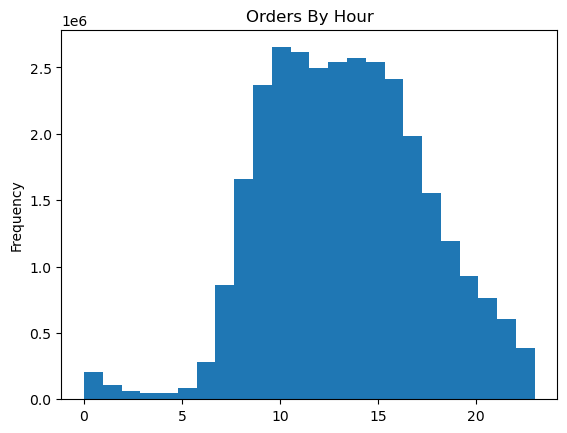

In [48]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [49]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

## Departments Frequency

Text(0.5, 1.0, 'Orders by Department')

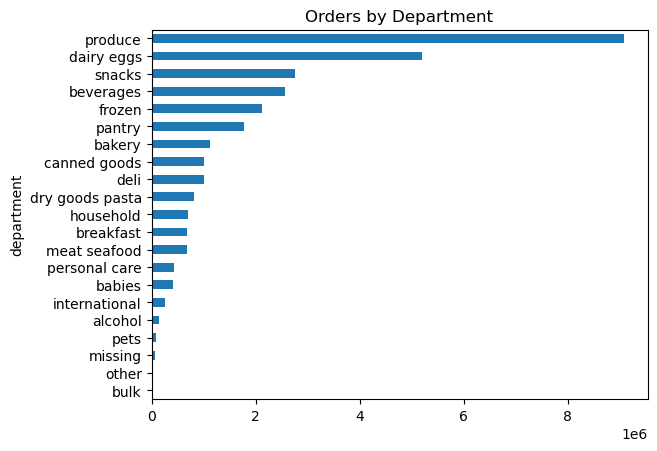

In [57]:
department_frequency = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [58]:
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency_bar_bar.png'))

In [59]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile,week_days_orders
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Monday
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
2,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday
4,431534,1,prior,5,4,15,28.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday


## User Distribution - Brand Loyalty

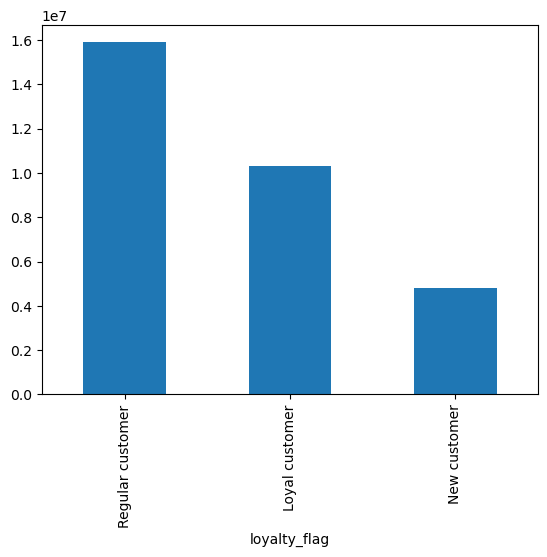

In [60]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

## Ordering Habits Based on Customer’s Loyalty Status

In [61]:
loyalty_flag_departments = pd.crosstab(df['department'],df['loyalty_flag'], dropna = False)

In [62]:
loyalty_flag_departments

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38726,28647,77301
babies,167108,46708,196576
bakery,381686,172636,570704
beverages,855024,396658,1320252
breakfast,223866,107357,346872
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1835676,752101,2604051
deli,324046,158335,521453


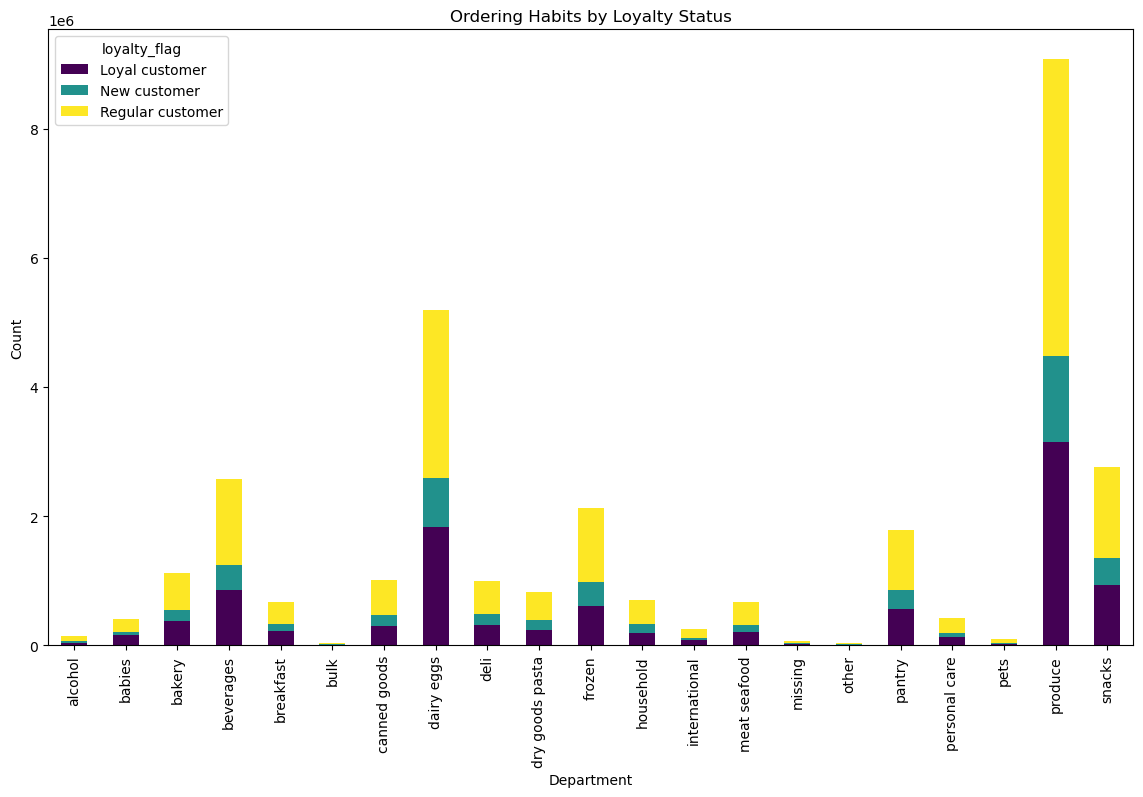

In [63]:
# Create a crosstab of loyalty_flag and departments
loyalty_flag_departments = pd.crosstab(df['department'], df['loyalty_flag'], dropna=False)

# Reorder columns for better visualization
loyalty_flag_departments = loyalty_flag_departments[['Loyal customer', 'New customer', 'Regular customer']]

# Create a stacked bar chart
loyalty_flag_departments.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_departments_bar.png'))

## Ordering Habits Based On a Customer’s Region

In [64]:
loyalty_flag_region = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

In [65]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2375969,1137734,3754004
Northeast,1843750,842941,2783377
South,3408818,1595046,5316598
West,2665200,1232129,4037098


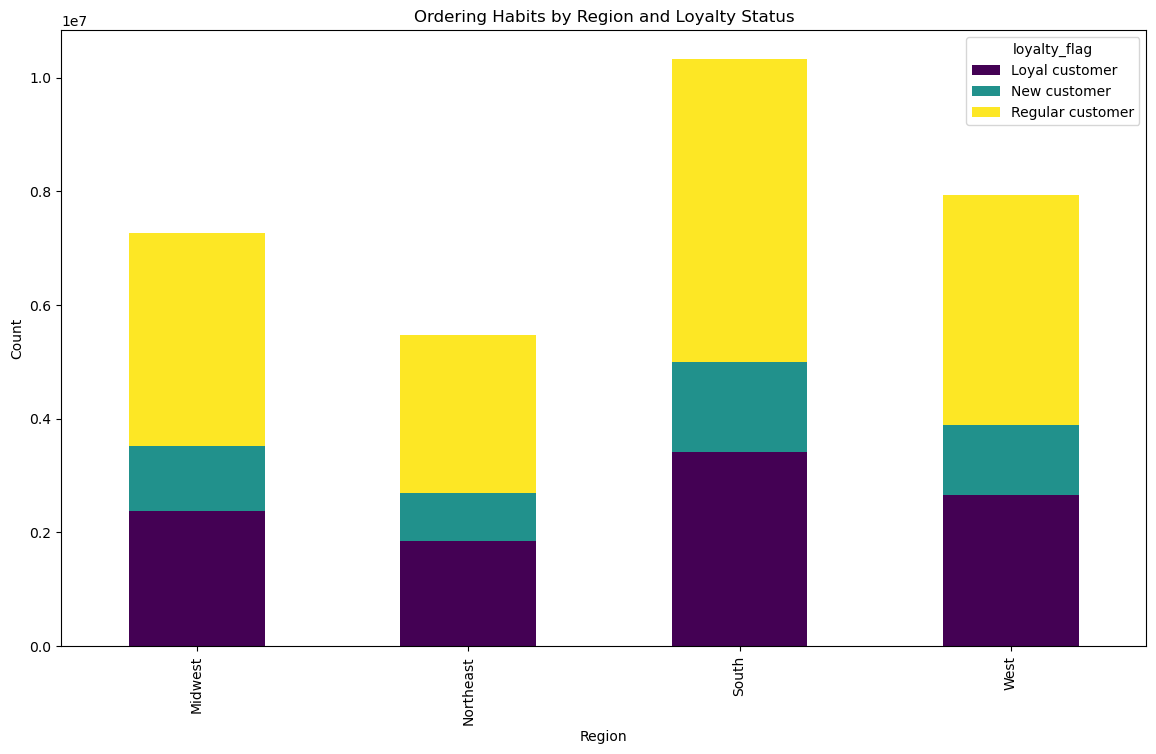

In [66]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)
# Reorder columns for better visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]
# Create a stacked bar chart
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_region_bar.png'))
# Show the plot
plt.show()

## Connection between age and family status in terms of ordering habits

In [67]:
age_family_profile = pd.crosstab(df['age_group'],df['family_profile'], dropna = False)

In [68]:
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29 years old,1402217,1489133,724262,707464,758349,741596
30-44 years old,2719694,2727681,0,909191,0,911080
45-59 years old,2748723,2739393,0,906855,0,923085
60-81 years old,3934958,4001222,0,1338622,0,1309139


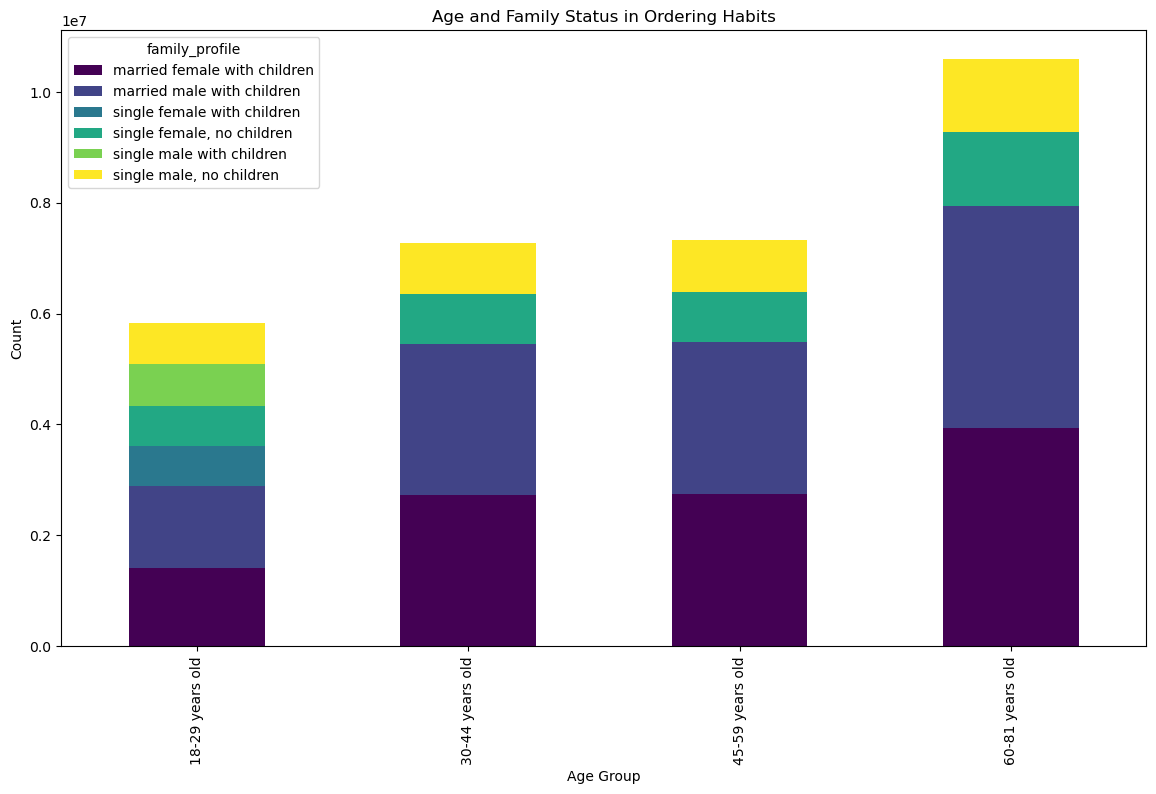

In [69]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Create a stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_bar_chart.png'))
# Show the plot
plt.show()

## Exploring whether there is a connection between age and spending power (income)

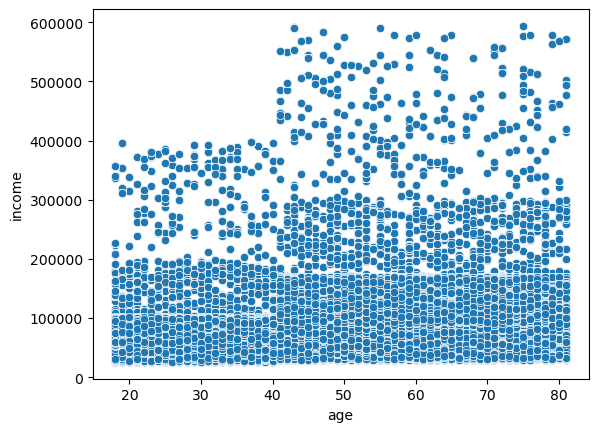

In [70]:
# There is a positive relationship between age and income. We can see that clearly on people of age of over 40
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

In [71]:
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot.png'))

In [73]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile,week_days_orders
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Monday
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
2,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Tuesday
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday
4,431534,1,prior,5,4,15,28.0,196,1,1,...,married,40423,South,active customer,30-44 years old,Low Income,beverages,Has dependants,married female with children,Wednesday


## Age and Family Status in Ordering Habits

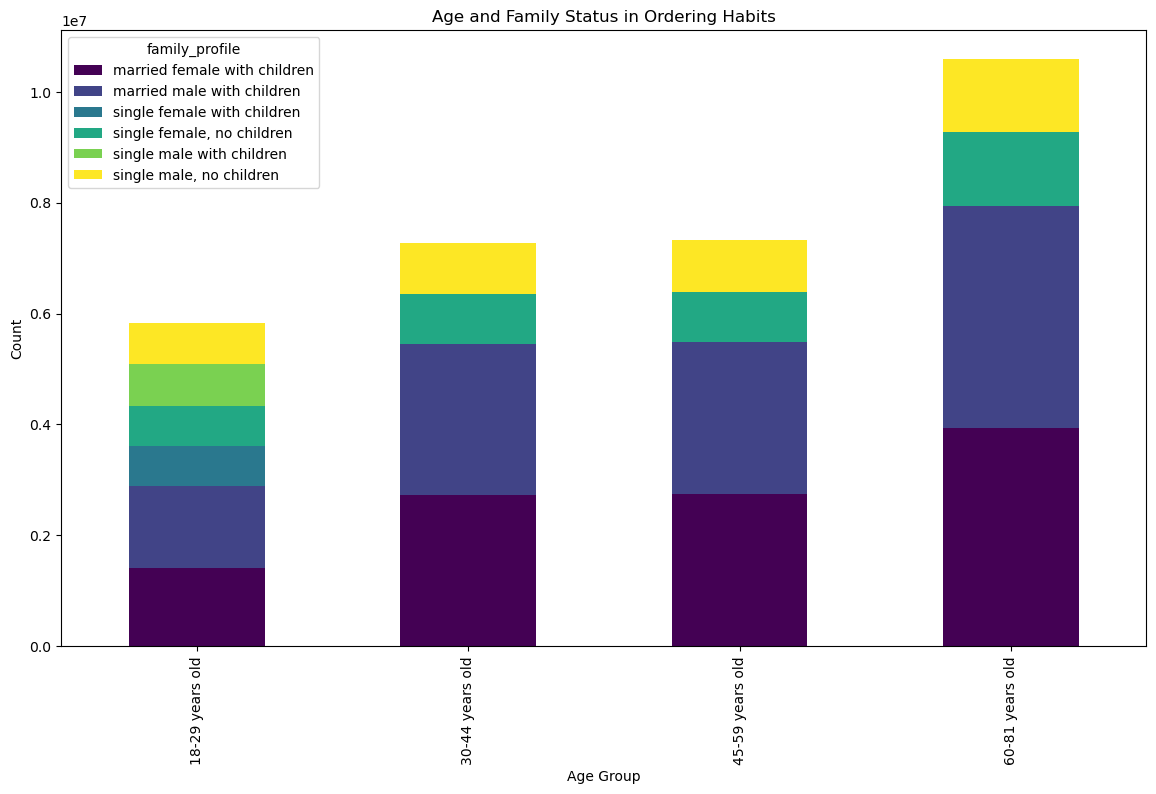

In [75]:
# Creating a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_bar_chart.png'))

# Show the plot
plt.show()

## Most of the customers are married

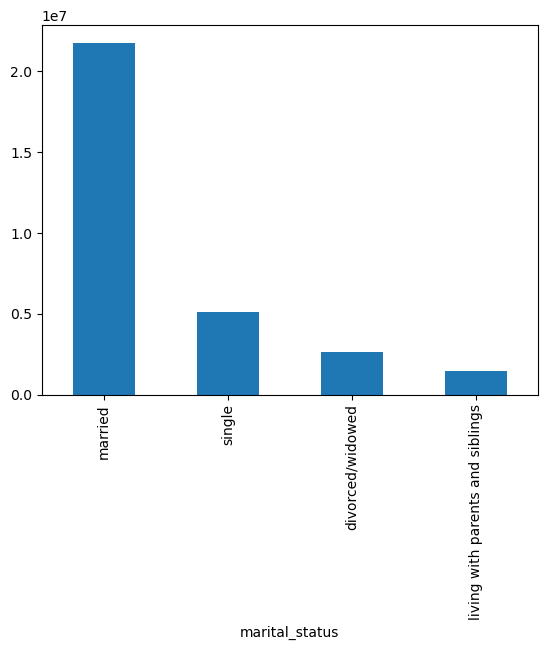

In [76]:
bar_marital = df['marital_status'].value_counts().plot.bar()

In [77]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [80]:
# Create bins for price range
bins = [-float("inf"), 6, 15, float("inf")]
labels = ['Low range', 'Mid range', 'High range']

# Create a new column 'price_range' based on the 'price' column and the specified bins
df['price_range'] = pd.cut(df['prices'], bins=bins, labels=labels)

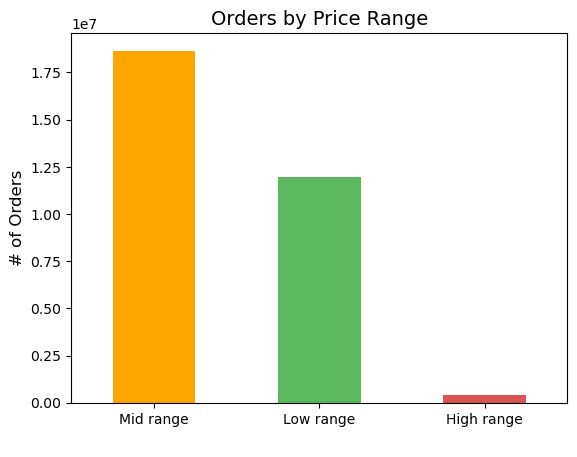

In [81]:
# Price Groupings
bar_price_group = df['price_range'].value_counts()
bar_price_group = bar_price_group.plot(kind='bar', color=['#ffA500','#5cb85c', '#d9534f'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("# of Orders", fontsize=12)  
plt.title("Orders by Price Range", fontsize=14)
plt.show()


In [82]:
# Export visual
bar_price_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_price_range.png'))

In [83]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range'], dropna = False)

In [84]:
prices_by_hour

price_range,Low range,Mid range,High range
order_hour_of_day,,,
0,79415,126149,2644
1,41929,66440,1335
2,25340,39515,885
3,18537,29682,612
4,19318,30820,664
5,32066,51424,1018
6,107145,170515,3622
7,329345,523441,11274
8,638717,1000998,21155


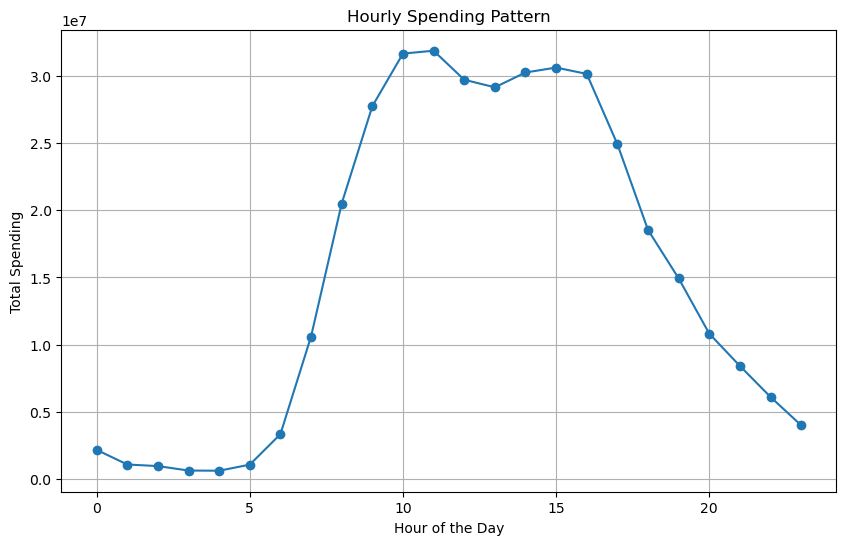

In [85]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)
# Save the plot
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_spending_plot.png'))

## Income Distribution By Price Range

In [88]:
price_range_income = pd.crosstab(df['price_range'],df['income_group'], dropna = False)

In [89]:
price_range_income

income_group,High Income,Low Income,Middle Income
price_range,,,
Low range,2857278,3383972,5699958
Mid range,4778716,4293308,9581475
High range,111832,71575,214550


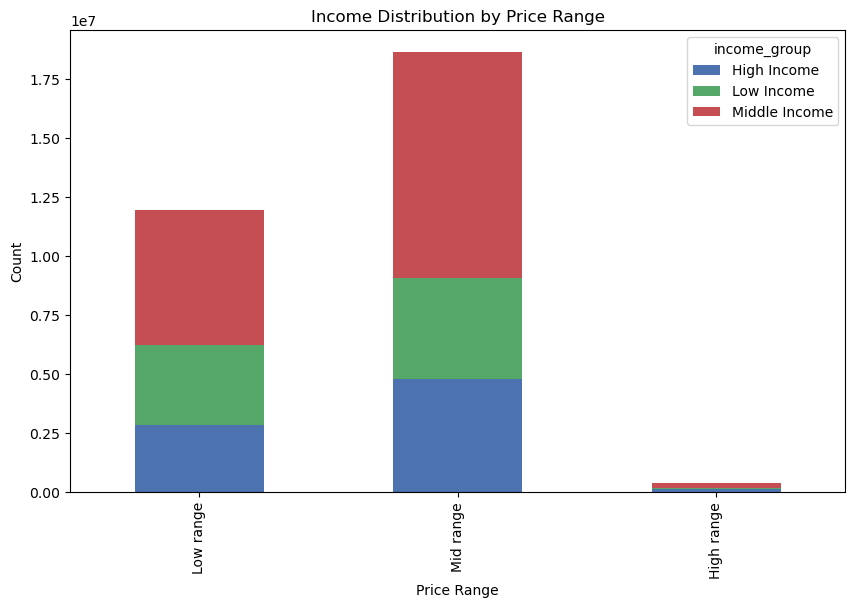

In [90]:
# Creating a stacked bar chart with custom colors
price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_income_bar.png'))


## Price Range & Family Profile Distribution

In [91]:
price_range_family_profile = pd.crosstab(df['price_range'],df['family_profile'], dropna = False)

In [92]:
price_range_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
price_range,,,,,,
Low range,4167841,4218936,278214,1488115,292200,1495902
Mid range,6498350,6596390,436930,2325996,456270,2339563
High range,139401,142103,9118,48021,9879,49435


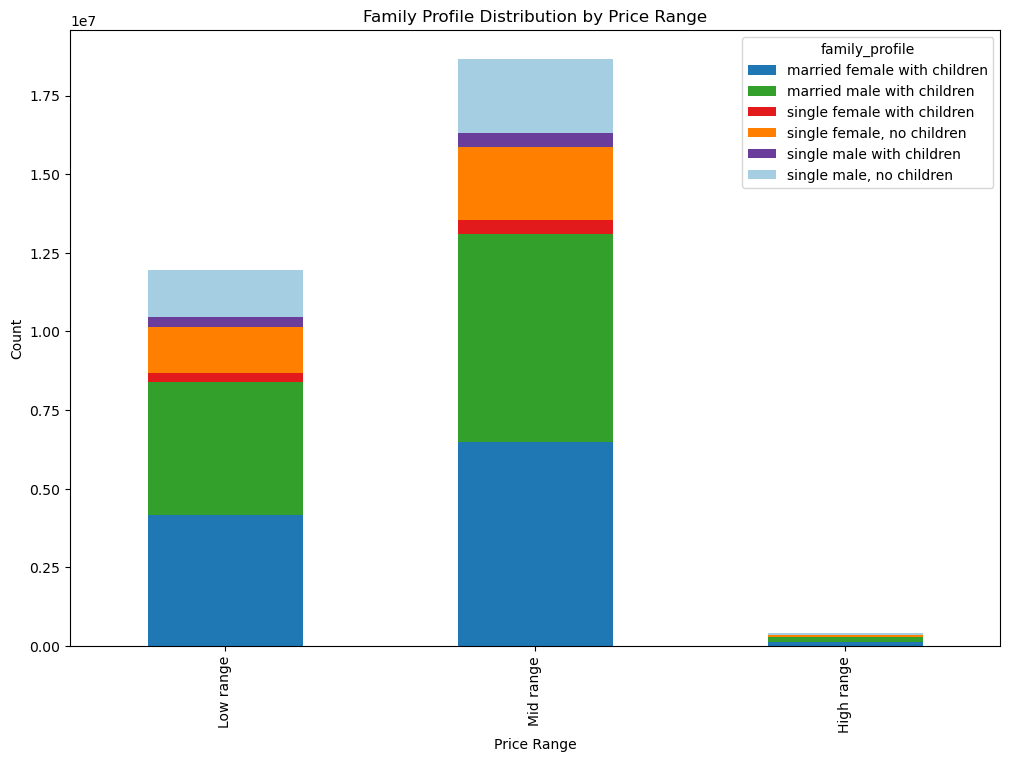

In [93]:
# Reorder columns for better visualization
price_range_family_profile = price_range_family_profile[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Define custom colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
# Create a bar chart with custom colors
price_range_family_profile.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
# Title and labels
plt.title('Family Profile Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_bar.png'))

In [94]:
# importing this final cleaned data set
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_visual_the_end.pkl'))